# Arboles de desición usados para calcular regresiones lineales

In [10]:
df = read.csv('Position_Salaries.csv')
df = df[2:3] # no uso el texto
df

Level,Salary
<int>,<int>
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000


In [11]:
# paquete que sirve pa particionar recursivamente y regresiones con arboles de desicion
require(rpart)

In [12]:
# hago la regresion con arboles de desiciones
regresion = rpart(formula = Salary~.,
                    data = df)

In [13]:
library(ggplot2)

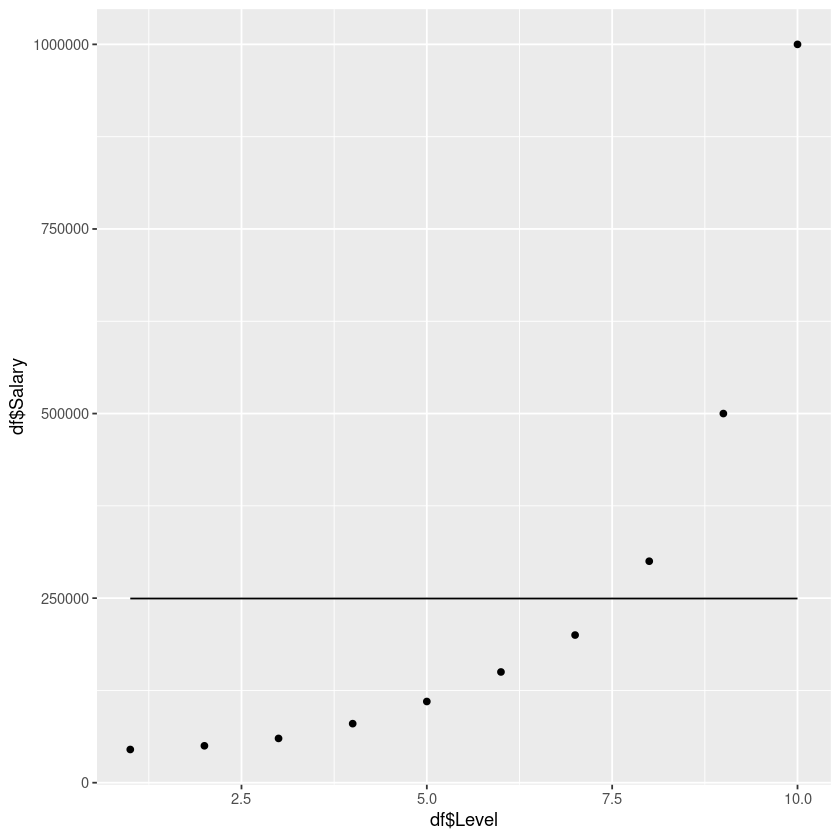

In [14]:
ggplot() +
    geom_point(aes(x = df$Level, y = df$Salary)) +
    geom_line(aes(x = df$Level, y = predict(regresion, newdata = df))) 

como podemos ver el arbol de desicion hizo lo contrario que en python, dado que no se cumplieron algunas condiciones para dividir el arbol, no realizó ninguna division, asi que solo cre un grupo y su valor es el promedio (o eso asumo) de todos los puntos

In [15]:
# modificamos los parametros de rpart() para que realice más de una desicion
regresion = rpart(formula = Salary~.,
                    data = df,
                    control = rpart.control(minsplit = 1)) 
# minsplit = 1 quiere decir que si tenemos un elemento en el grupo, este grupo puede separarse del siguiente
# antes este valor era de 20, y dado que solo tenemos 10 elementos, no se podia dividir ni una sola vez

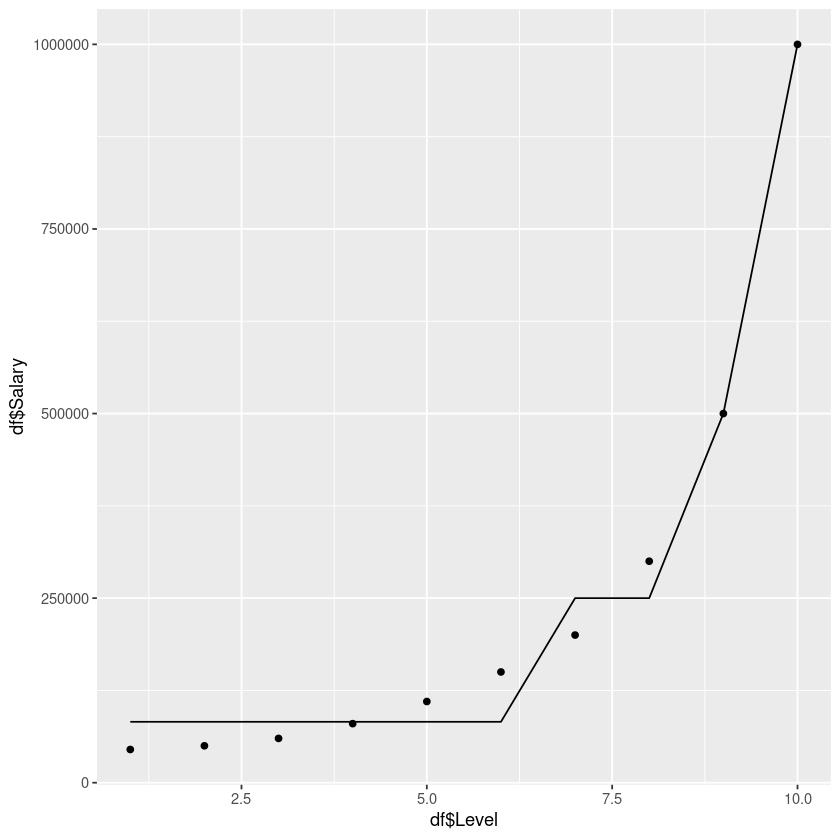

In [16]:
ggplot() +
    geom_point(aes(x = df$Level, y = df$Salary)) +
    geom_line(aes(x = df$Level, y = predict(regresion, newdata = df))) 

mucho mejor division porque, pos ahora hubo division, aunque para que se entienda mejor que esto es una grafica escalada voy a graficarlo de forma más continua

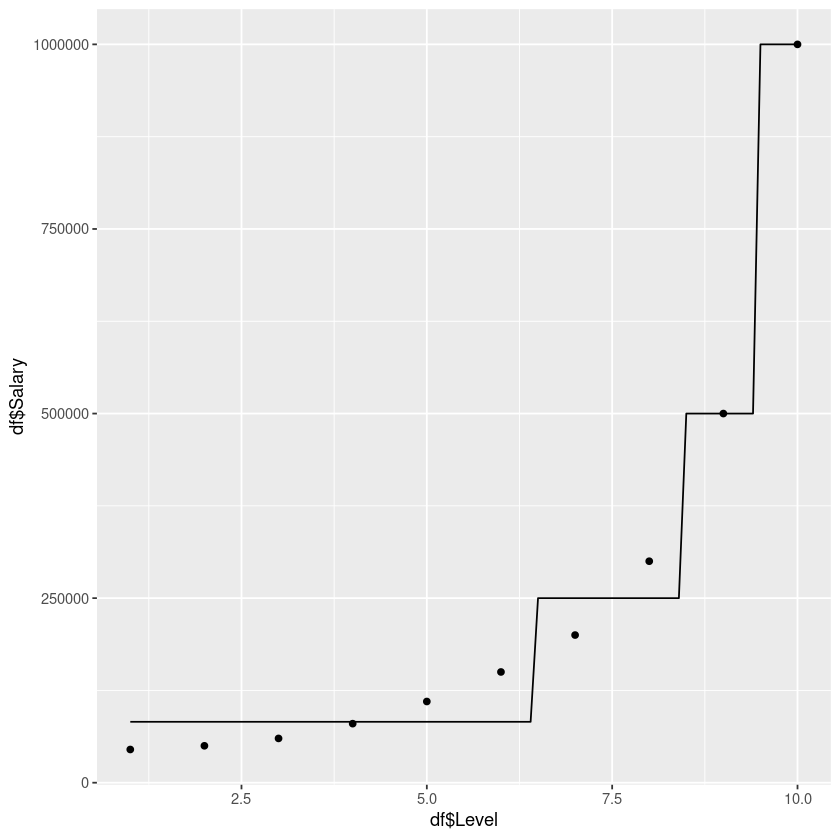

In [17]:
rango = seq(min(df$Level), max(df$Level), 0.1)
df_rango = data.frame(Level = rango)
ggplot() +
    geom_point(aes(x = df$Level, y = df$Salary)) +
    geom_line(aes(x = rango, y = predict(regresion, newdata = df_rango))) 

podemos ver claramente las divisiones que hizo el desicion tree, al inicio los valores no son muy diferentes asi que los dejo juntitos, pero a partir del 6 hay grandes diferencias asi que tiene que comenzar a dividir